# Ignoring warnings using warning module

In [1]:
import warnings as warn
warn.filterwarnings('ignore')

# Installing Ultralytics library 

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 12.7 MB/s eta 0:00:0000:01


# Installing YoloV8

In [3]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


# Getting started with model training

In [ ]:
!yolo task=classify mode=train model=yolov8n-cls.pt data='/kaggle/input/bald-dataset-ultra-pro-mx/Dataset' epochs=25 imgsz=256

100%|██████████████████████████████████████| 5.30M/5.30M [00:00<00:00, 65.2MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/input/bald-dataset-ultra-pro-mx/Dataset, epochs=25, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

# Visualizing the confusion matrix to check model performance


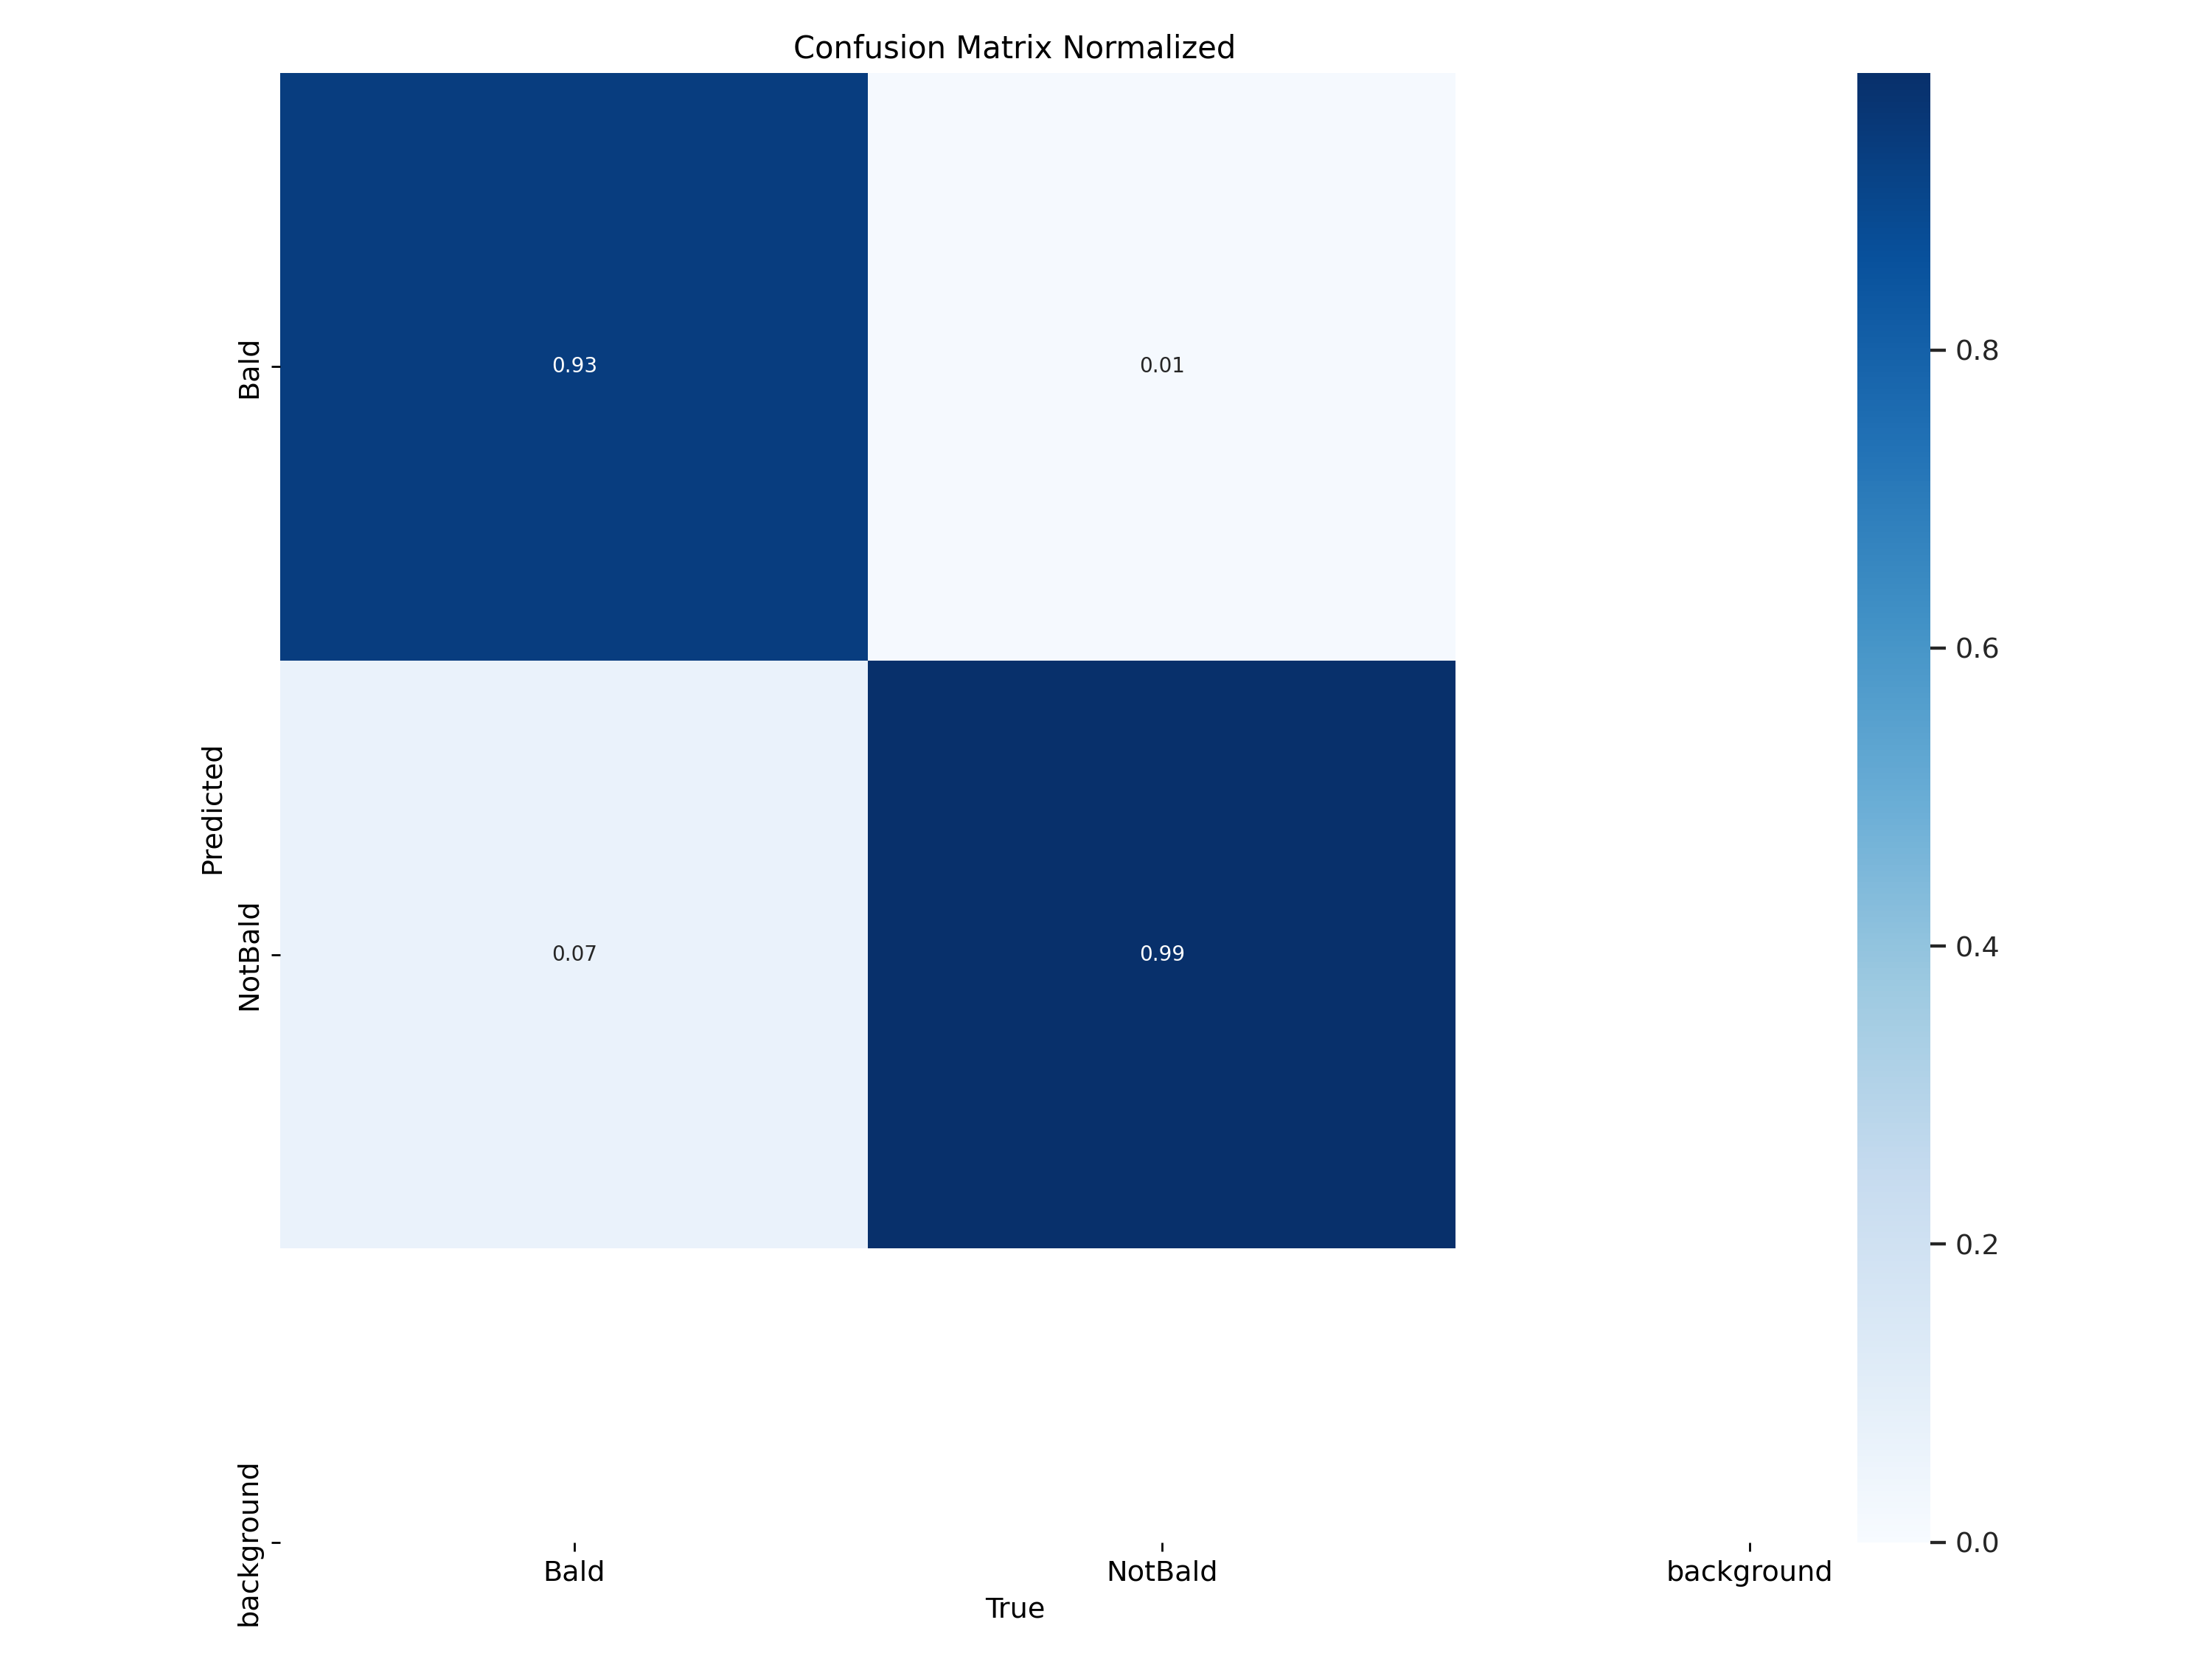

In [5]:
Image('/kaggle/working/runs/classify/train/confusion_matrix_normalized.png',width=600)

# Visualizing the results of model training


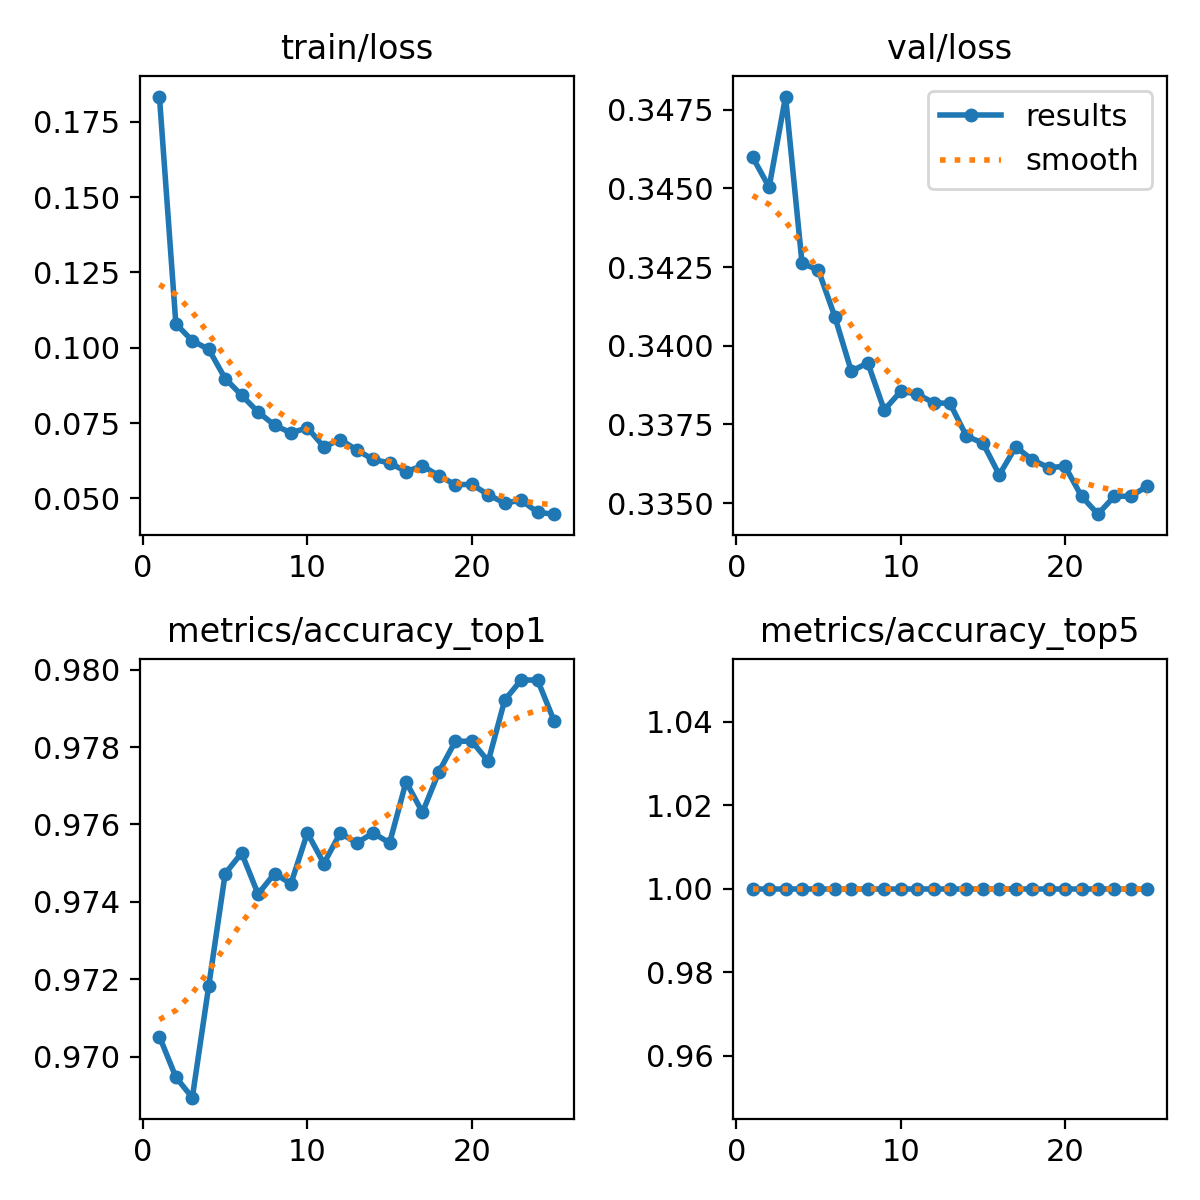

In [6]:
Image('/kaggle/working/runs/classify/train/results.png',width=600)

# Getting started with model validation


In [7]:
!yolo task=classify mode=val model='/kaggle/working/runs/classify/train/weights/best.pt' data='/kaggle/input/bald-dataset-ultra-pro-mx/Dataset'

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/input/bald-dataset-ultra-pro-mx/Dataset/train... found 30000 images in 2 classes ✅ 
val: /kaggle/input/bald-dataset-ultra-pro-mx/Dataset/val... found 3799 images in 2 classes ✅ 
test: /kaggle/input/bald-dataset-ultra-pro-mx/Dataset/test... found 3400 images in 2 classes ✅ 
val: Scanning /kaggle/input/bald-dataset-ultra-pro-mx/Dataset/val... 3799 images
val: WARNING ⚠️ Cache directory /kaggle/input/bald-dataset-ultra-pro-mx/Dataset is not writeable, cache not saved.
               classes   top1_acc   top5_acc: 100%|██████████| 238/238 [00:08<00
                   all       0.98          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# viewing validation results

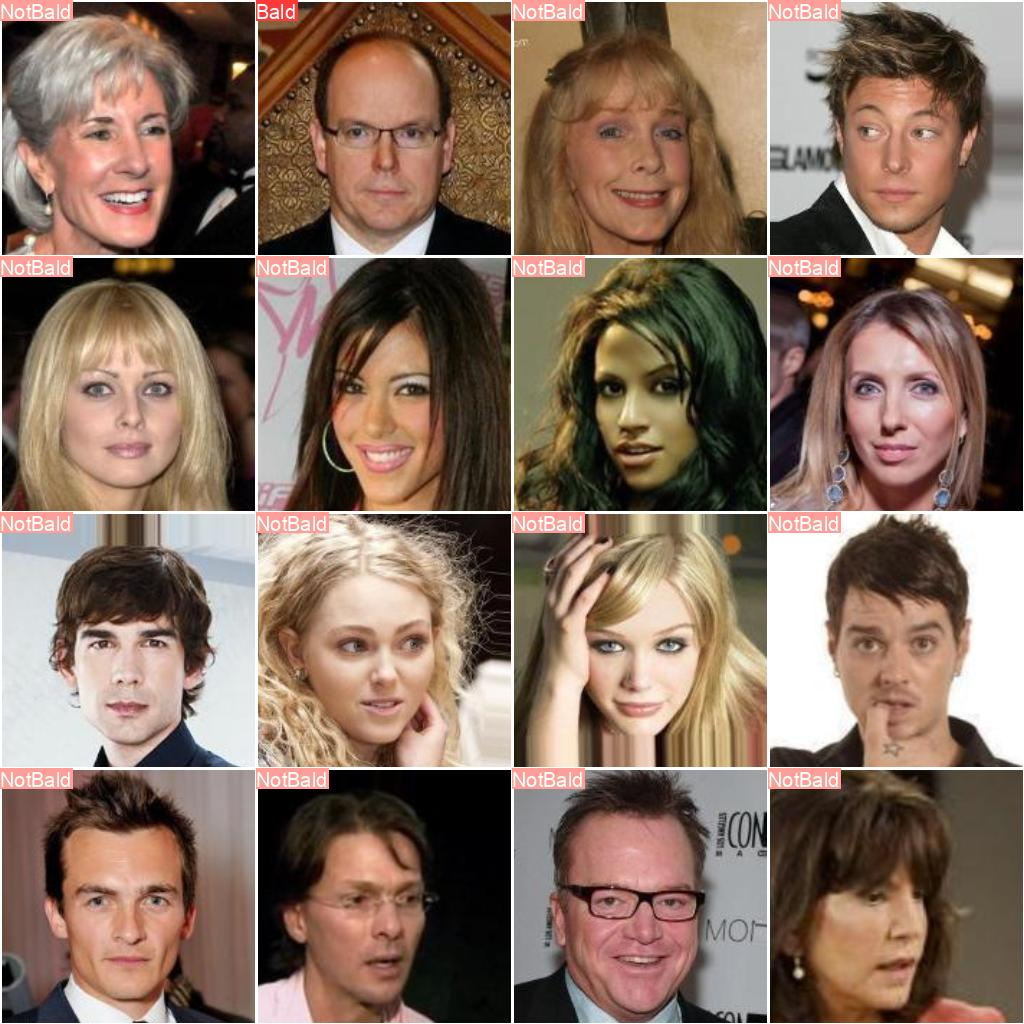

In [8]:
Image('/kaggle/working/runs/classify/val/val_batch0_pred.jpg',width=600)

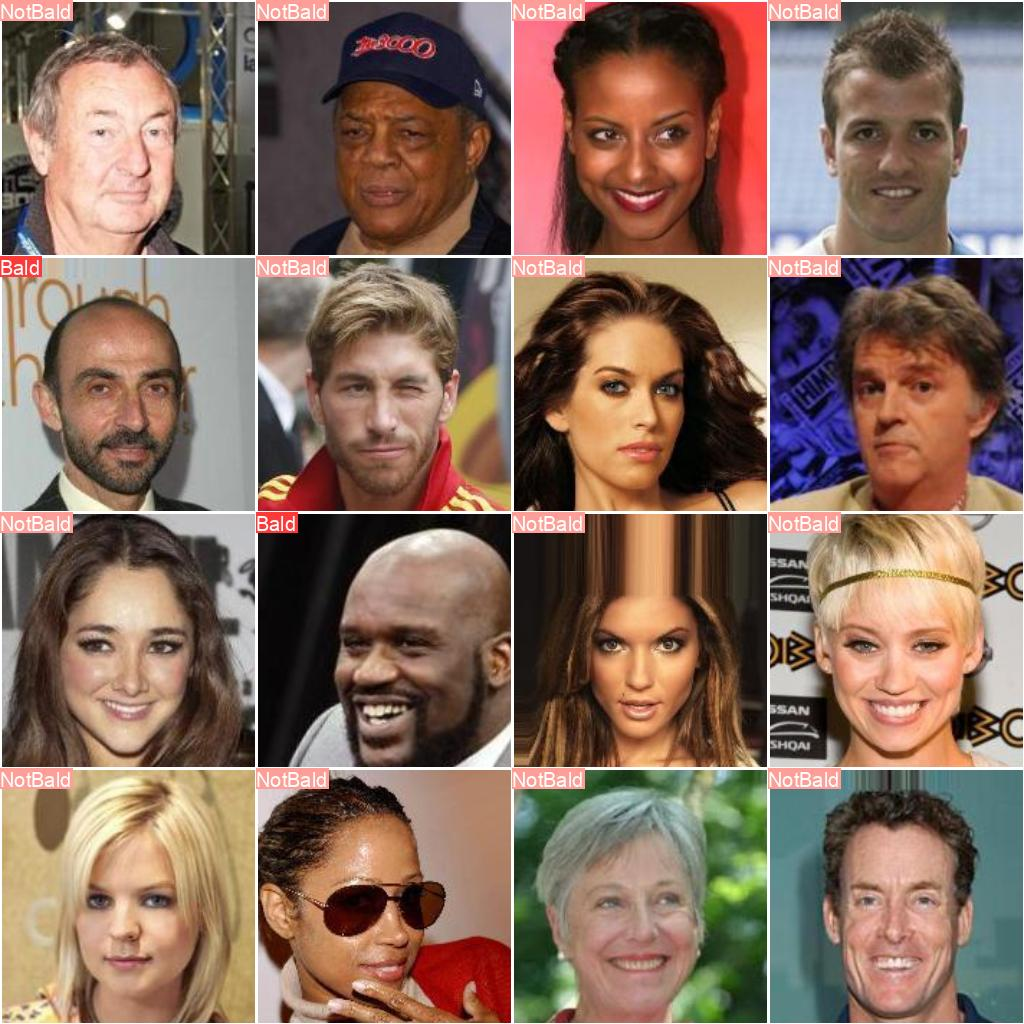

In [9]:
Image('/kaggle/working/runs/classify/val/val_batch1_pred.jpg',width=600)

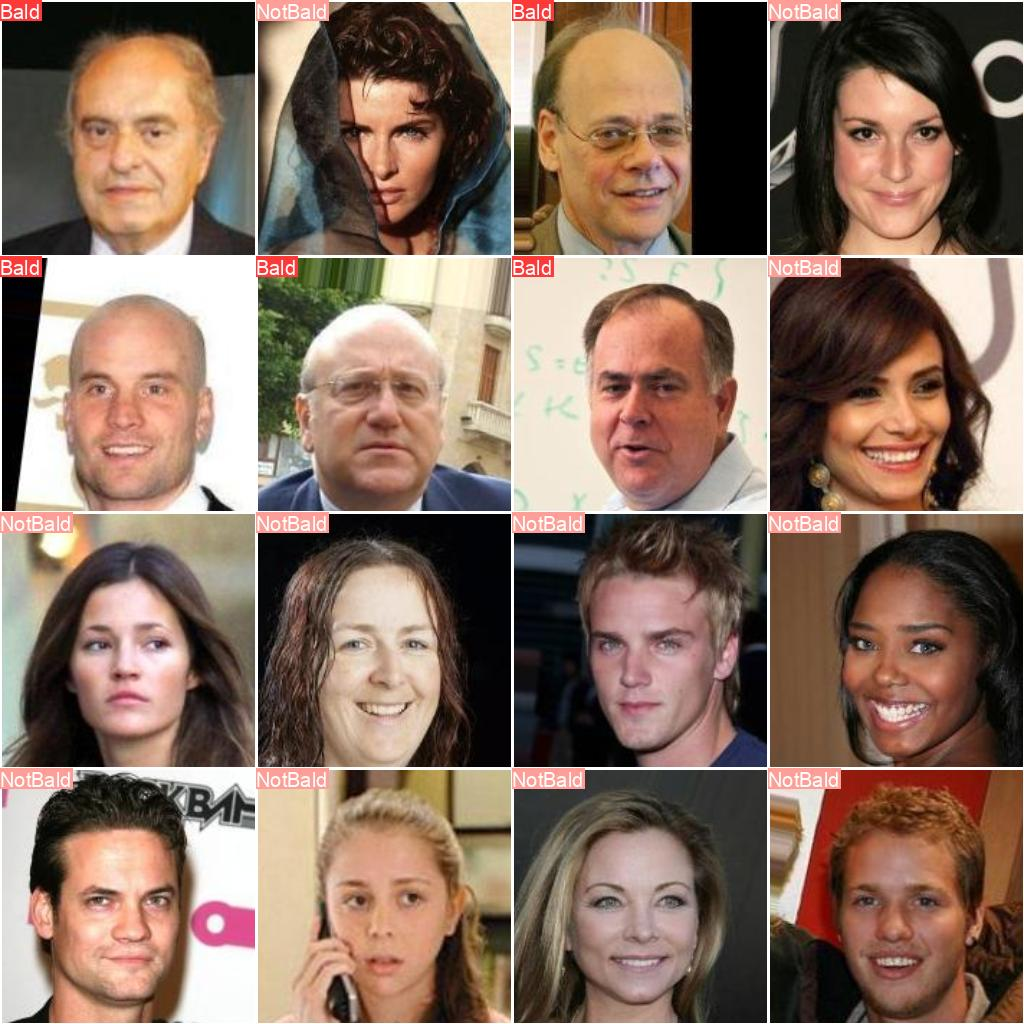

In [10]:
Image('/kaggle/working/runs/classify/val/val_batch2_pred.jpg',width=600)

# Getting started with model prediction


In [11]:
!yolo task=classify mode=predict model= '/kaggle/working/runs/classify/train/weights/best.pt' conf=0.25 source="/kaggle/input/bald-dataset-ultra-pro-mx/Dataset/test/NotBald/160211.jpg"

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /kaggle/input/bald-dataset-ultra-pro-mx/Dataset/test/NotBald/160211.jpg: 256x256 NotBald 1.00, Bald 0.00, 2.8ms
Speed: 10.4ms preprocess, 2.8ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


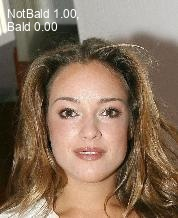

In [12]:
Image('/kaggle/working/runs/classify/predict/160211.jpg',width=600)

In [18]:
!yolo task=classify mode=predict model= '/kaggle/working/runs/classify/train/weights/best.pt' conf=0.25 source="/kaggle/input/bald-dataset-ultra-pro-mx/Dataset/test/Bald/160829.jpg"


Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /kaggle/input/bald-dataset-ultra-pro-mx/Dataset/test/Bald/160829.jpg: 256x256 Bald 0.99, NotBald 0.01, 2.9ms
Speed: 5.4ms preprocess, 2.9ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/classify/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


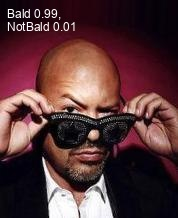

In [19]:
Image('/kaggle/working/runs/classify/predict4/160829.jpg',width=600)